In [40]:
from __future__ import print_function
%matplotlib inline
import geopandas as gpd
import numpy as np
import pylab as pl
import pandas as pd
import io
import shapely
from geopandas.tools import sjoin
from geopandas import GeoDataFrame
from matplotlib import pyplot as plt
import pylab
import os
import zipfile
import json
from fiona.crs import from_epsg
import sys
try:
    import urllib2 as urllib
except ImportError:
    import urllib.request as urllib
import requests




# Read in Data

In [41]:
#Set the environmental variable PUIDATA
puidata = os.getenv("PUIDATA")
if not puidata or puidata == '/nfshome/sjs909/PUIdata':
    puidata = '/nfshome/sjs909/PUIDATA'

os.environ["PUIDATA"] = puidata
os.environ["PUIDATA"]

'/nfshome/sjs909/PUIDATA'

In [42]:
NYSShape = gpd.GeoDataFrame.from_file('%s/NYSdir/cugir-007865'%os.getenv("PUIDATA"))

In [5]:
NYSShape.head()

,STATE,COUNTY,NAME,LSAD,LSAD_TRANS,OID_,COUNTY_FIP,POP2000,WHITE,BLACK,...,FHH_MINORC,FAMILIES,AV_FAM_SZ,HSE_UNITS,URBAN,RURAL,VACANT,OWNER_OCC,RENTER_OCC,geometry
0,36,089,St. Lawrence,06,County,44,089,111931,105782,2664,...,2773,26939,3,49721,16085,33636,9215,28606,11900,"POLYGON ((-74.712396 44.953008, -74.7111320000..."
1,36,019,Clinton,06,County,9,019,79894,74562,2863,...,1951,19261,3,33091,12161,20930,3668,20157,9266,"POLYGON ((-74.025026 44.980036, -74.0274011055..."
2,36,033,Franklin,06,County,16,033,51134,42970,3389,...,1312,11805,3,23936,7409,16527,6005,12638,5293,"POLYGON ((-74.025026 44.980036, -74.021078 44...."
3,36,031,Essex,06,County,15,031,38851,36848,1092,...,810,9832,3,23115,4288,18827,8087,11089,3939,"POLYGON ((-73.46411999999999 44.5354, -73.4649..."
4,36,045,Jefferson,06,County,22,045,111738,99118,6517,...,2815,28142,3,54070,20947,33123,14002,23906,16162,POLYGON ((-75.86007064557869 44.40327395405457...


In [4]:
Fulton = NYSShape.loc[NYSShape['NAME'] == 'Fulton']
Schoharie = NYSShape.loc[NYSShape['NAME'] == 'Schoharie']

In [5]:
HighF = pd.concat([Fulton, Schoharie], axis=0)

In [6]:
races = ('WHITE','BLACK',         u'AMER_ES',           u'ASIAN',
               u'HAWN_PI',           u'OTHER',       u'MULT_RACE',
              u'HISPANIC')

WHITE
0.959871443357
BLACK
0.0180124561945
AMER_ES
0.00190656038349
ASIAN
0.00532021135584
HAWN_PI
0.000163419461442
OTHER
0.00559257712491
MULT_RACE
0.00913333212282
HISPANIC
0.0160514226572


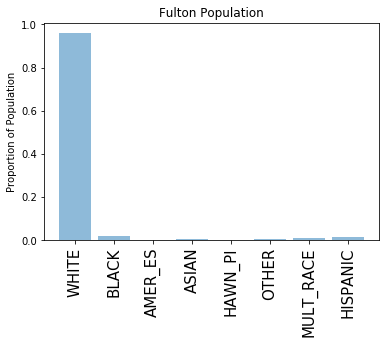

In [44]:
# Make proportion of Race Population for Fulton
fnList = []
for i in range(len(races)):
    print(races[i])
    print((HighF.iloc[0][races[i]])/HighF.iloc[0]['POP2000'])
    fnList.append((HighF.iloc[0][races[i]])/HighF.iloc[0]['POP2000'])

y_pos = np.arange(len(races))
 
plt.bar(y_pos, fnList, align='center', alpha=0.5)
pl.xticks(rotation=90, fontsize=15)
plt.xticks(y_pos, races)
plt.ylabel('Proportion of Population')
plt.title('Fulton Population')
plt.savefig('Fulton.png')

My feedback from last time was how the demographics did not include the white population, skewing the interpretation of the demographics. Also how a stacked bar plot was not easy to breakdown. So I made a regular bar graph where you can now see that the white population is the highest. And I did the same for the other county.

WHITE
0.966183268951
BLACK
0.0127604331581
AMER_ES
0.00303970616174
ASIAN
0.00379963270217
HAWN_PI
0.00022164524096
OTHER
0.00471787727186
MULT_RACE
0.00927743651447
HISPANIC
0.0186182002406


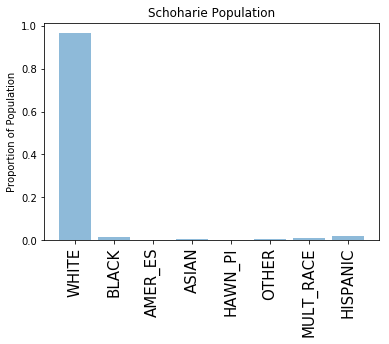

In [45]:
schList = []
for i in range(len(races)):
    print(races[i])
    print((HighF.iloc[1][races[i]])/HighF.iloc[1]['POP2000'])
    schList.append((HighF.iloc[1][races[i]])/HighF.iloc[1]['POP2000'])

y_pos = np.arange(len(races))
 
plt.bar(y_pos, schList, align='center', alpha=0.5)
pl.xticks(rotation=90, fontsize=15)
plt.xticks(y_pos, races)
plt.ylabel('Proportion of Population')
plt.title('Schoharie Population')
plt.savefig('Schoharie.png')